<a href="https://colab.research.google.com/github/pablohls/projeto-estudo/blob/master/Forma%C3%A7%C3%A3o_Machine_Learning_Projeto_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import warnings
warnings.simplefilter("once")

!pip install pandas
!pip install seaborn
!pip install scipy
!pip install yellowbrick
!pip install numpy

In [3]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.3.1
Usando yellowbrick 0.9.1
Usando numpy 1.16.4


In [0]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [0]:
# solução

enem = pd.read_csv("'input/MICRODADOS_ENEM_2017.CSV'",
                   usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2",
                            "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])

In [6]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
2,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000
3,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000
4,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000


In [7]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

4426755 elementos e 9 colunas
ERRO! No conjunto de 2017 existem 6731341 dados


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [0]:
# solução
todas_as_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]


In [9]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
2,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000
3,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000
4,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [10]:
# solução
enem = enem.dropna()
enem['NU_NOTA_MT'].head()


0   465.500
1   591.200
2   584.600
3   578.500
4   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [11]:
# solução e impressão
enem['nota_total'] = enem.NU_NOTA_CH + enem.NU_NOTA_CN + enem.NU_NOTA_LC + enem.NU_NOTA_MT + enem.NU_NOTA_COMP1 + enem.NU_NOTA_COMP2 + enem.NU_NOTA_COMP3 + enem.NU_NOTA_COMP4 + enem.NU_NOTA_COMP5

enem['nota_total'].head()

0   2681.400
1   2949.500
2   2786.700
3   2795.000
4   2858.500
Name: nota_total, dtype: float64

In [0]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


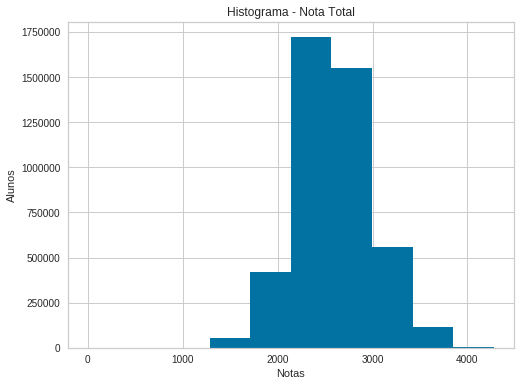

In [13]:
# solução histograma e descrição
plt.figure(figsize=(8,6))
plt.hist(enem['nota_total'])
plt.title('Histograma - Nota Total')
plt.xlabel('Notas')
plt.ylabel('Alunos')
plt.legend(loc='best')
plt.show()

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


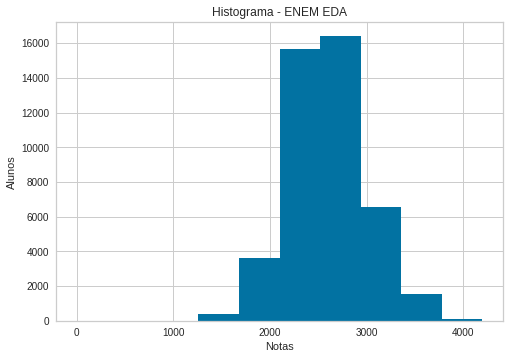

In [14]:
import matplotlib.pyplot as plt
import random
# solução sua função de sampling

def eda_sample(enem):
    SEED = 745
    np.random.seed(SEED)
    enem_eda = enem.sample(frac=.01, random_state=SEED)
    print("Enem EDA sampling tem a distribuição")

    plt.hist(enem_eda['nota_total'])
    plt.title('Histograma - ENEM EDA')
    plt.xlabel('Notas')
    plt.ylabel('Alunos')
    plt.show()
    
    return enem_eda

enem_eda = eda_sample(enem)

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [15]:
# solução
todas_as_notas = todas_as_notas + ["nota_total"]
correlacoes = enem.corr(method='pearson')
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


In [0]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [0]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes.iloc[9]

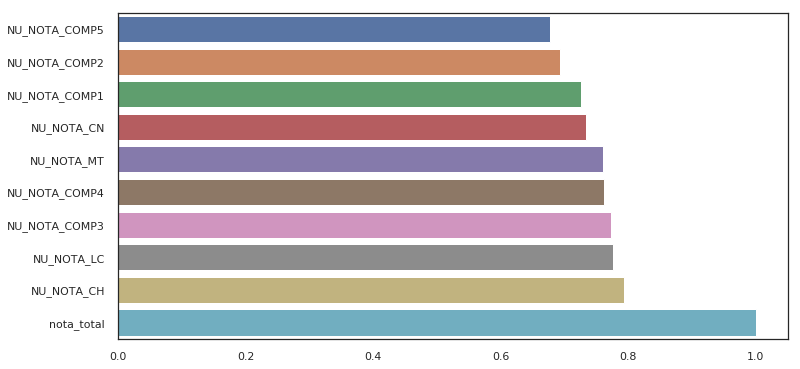

In [18]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = correlacao_com_nota_total.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [19]:
enem_eda

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
2228087,565.000,493.000,514.900,418.700,120.000,120.000,100.000,80.000,60.000,2471.600
182422,560.300,509.300,466.100,652.200,120.000,120.000,120.000,140.000,120.000,2807.900
1749630,497.600,547.100,539.900,532.700,120.000,100.000,80.000,120.000,40.000,2577.300
2843051,600.600,632.300,647.300,578.500,160.000,120.000,140.000,160.000,160.000,3198.700
3804992,554.200,458.700,419.900,374.900,120.000,80.000,120.000,80.000,40.000,2247.700
3731082,441.200,549.900,516.200,542.800,140.000,120.000,100.000,100.000,100.000,2610.100
2075706,413.000,396.800,430.500,487.900,60.000,120.000,80.000,60.000,0.000,2048.200
3209775,523.200,469.700,475.400,444.900,100.000,100.000,100.000,80.000,120.000,2413.200
1907541,571.800,571.800,548.200,484.200,120.000,160.000,120.000,100.000,80.000,2756.000
2691674,523.700,450.700,497.300,500.800,140.000,60.000,60.000,80.000,20.000,2332.500


In [20]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
2228087,418.700,514.900,2471.600
182422,652.200,466.100,2807.900
1749630,532.700,539.900,2577.300
2843051,578.500,647.300,3198.700
3804992,374.900,419.900,2247.700


In [0]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    SEED = 42367
    np.random.seed(SEED)

    x = dados.iloc[:,0:dados.shape[1]-1]
    y = dados.iloc[:,dados.shape[1]-1]

    train_x, test_x, train_y, test_y = train_test_split(x, y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [22]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706172


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino

    model = LinearRegression()
    model.fit(train_x, train_y)

    # calcule o r2_score com os dados de teste

    r2_score = model.score(train_x, train_y)

    # calcule a predição e os dois tipos de erros

    test_pred = model.predict(test_x)

    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)

    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [25]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.765591405135187
mse 36308.89210227679
mae 142.102755998379


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

In [0]:
from sklearn.model_selection import cross_validate

In [0]:
def calcular_desvio_padrao(test_x, test_y):
  SEED = 42367

  x = test_x
  y = test_y

  modelo = LinearRegression()
  resultados = cross_validate(modelo, x, y, cv=5)
  desvio_padrao = resultados['test_score'].std()
  return desvio_padrao 

In [28]:
calcular_desvio_padrao(test_x, test_y)

0.016551519620791436

## Solução

    Na minha interpretação os erros encontrados pelo modelo são relativamente baixos, tanto o desvio padrão quanto o erro médio absoluto. Mas acredito que o modelo também seja muito simples e que o resultado possa ser mais refinado.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

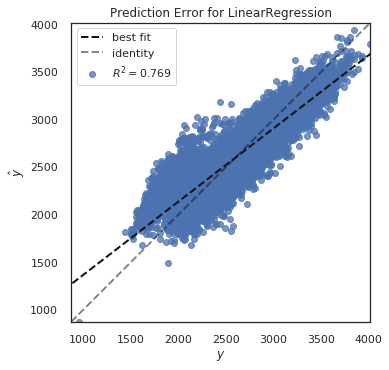

In [29]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

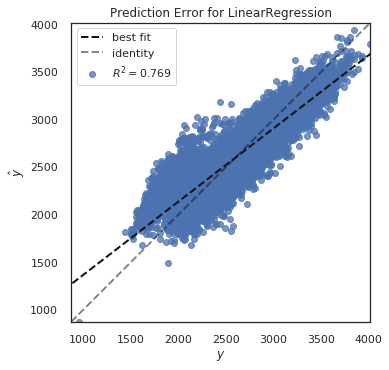

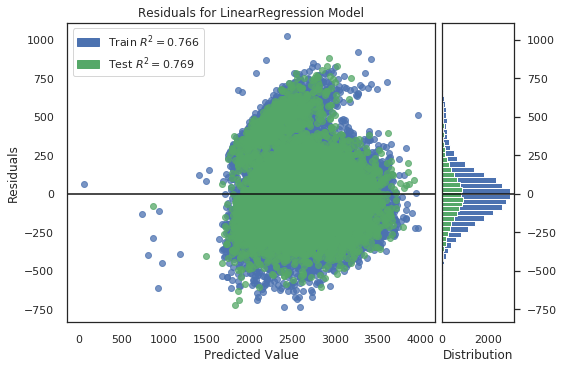

In [30]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [0]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 1.0
mse 1.4334303049714045e-25
mae 2.708473085179478e-13


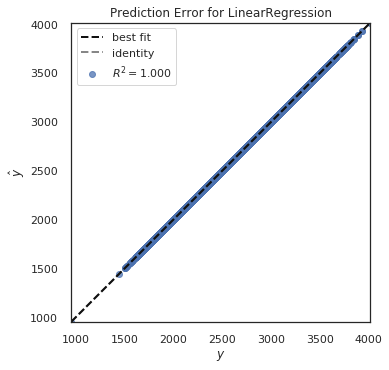

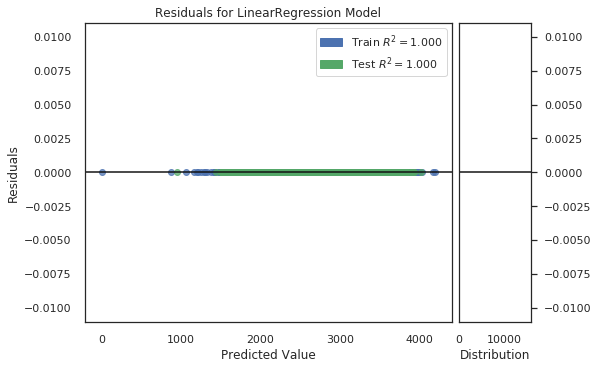

In [32]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

interesse = todas_as_notas
regressao_completa_para(interesse)



********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.99796437900271
mse 320.2722595881308
mae 14.44208329659811


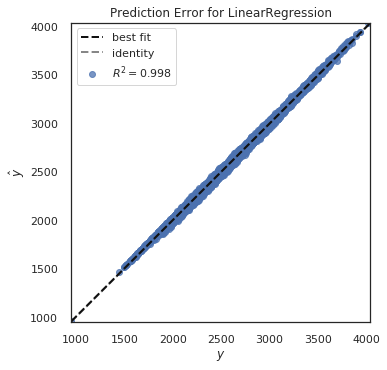

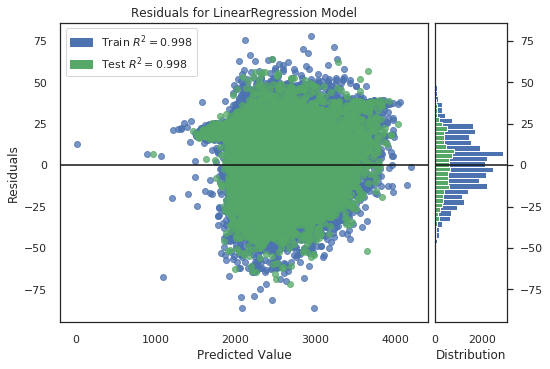

In [33]:
# solução 2: teste outra combinação

interesse = ['NU_NOTA_MT',	'NU_NOTA_CN',	'NU_NOTA_CH', 'NU_NOTA_LC',	'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total']
regressao_completa_para(interesse)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_COMP2'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9469856885681714
mse 8488.354593081991
mae 73.05862771324657


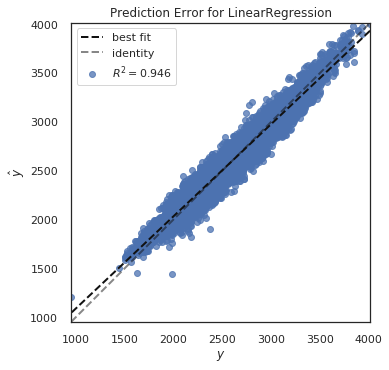

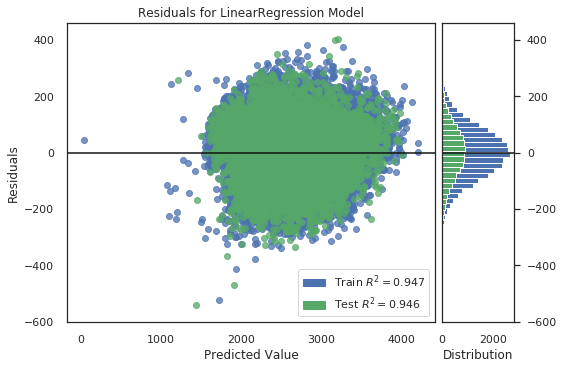

In [34]:
# solução 3: teste outra combinação

interesse = ['NU_NOTA_MT',	'NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_COMP2', 'nota_total']
regressao_completa_para(interesse)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9689514249920538
mse 4891.579356668068
mae 54.72211940380219


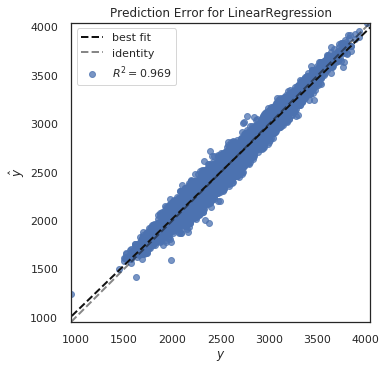

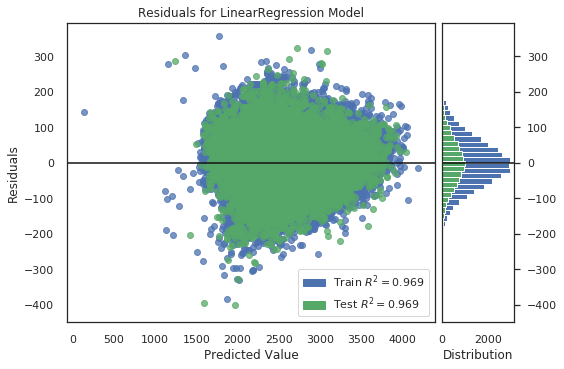

In [35]:
# solução 4: teste outra combinação

interesse = ['NU_NOTA_MT',	'NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'nota_total']
regressao_completa_para(interesse)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.5813772221814144
mse 65697.72943748323
mae 197.63243402264334


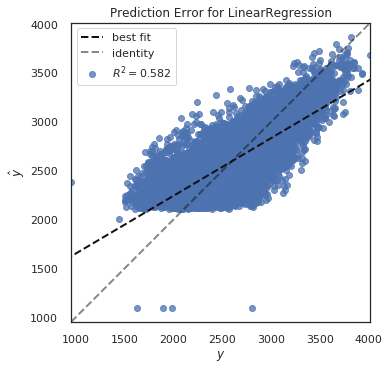

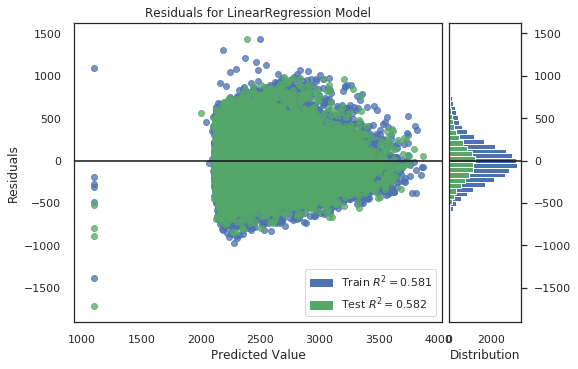

In [36]:
# solução 5: teste outra combinação

interesse = ['NU_NOTA_MT', 'nota_total']
regressao_completa_para(interesse)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP2'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8016806490944737
mse 31279.312364865826
mae 140.54104176738085


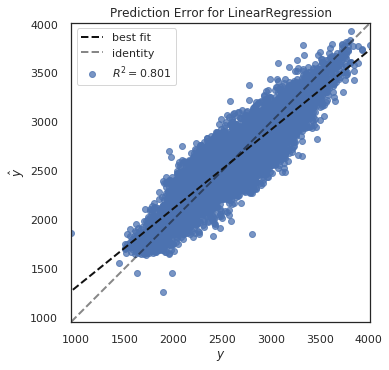

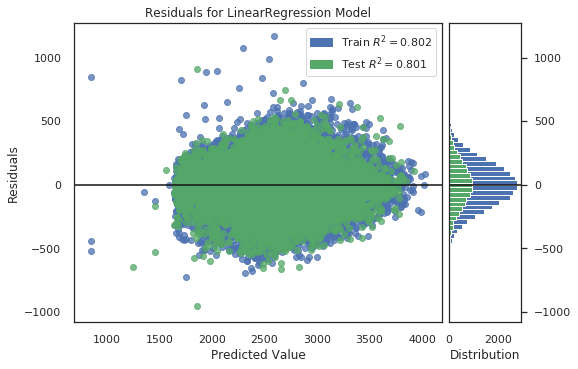

In [37]:
# solução 6: teste outra combinação

interesse = ['NU_NOTA_MT', 'NU_NOTA_COMP2', 'nota_total']
regressao_completa_para(interesse)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_CN' 'NU_NOTA_COMP2'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8892093499720937
mse 17521.485765232417
mae 104.68685655046701


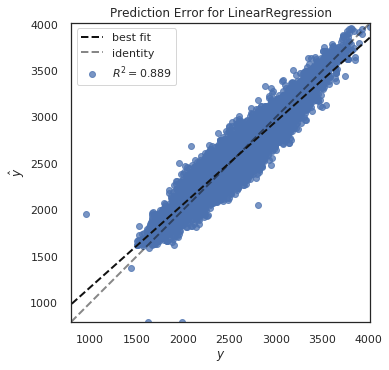

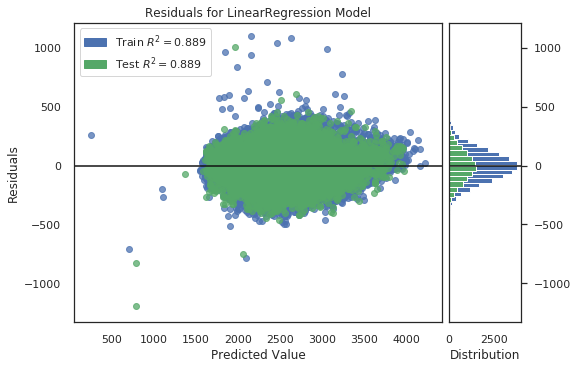

In [38]:
# solução 7: teste outra combinação

interesse = ['NU_NOTA_MT', 'NU_NOTA_CN',	'NU_NOTA_COMP2', 'nota_total']
regressao_completa_para(interesse)

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9251799786842586
mse 11788.567812316254
mae 86.18740233062171


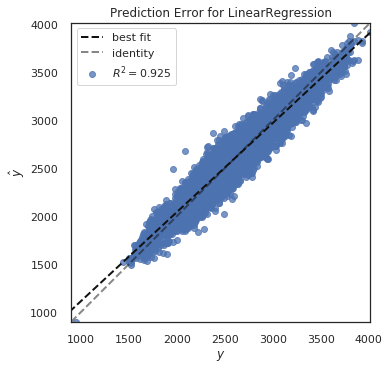

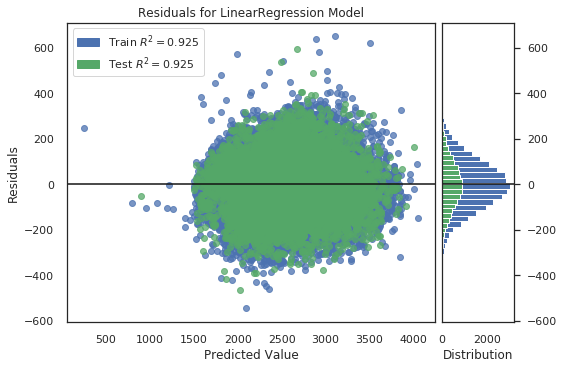

In [39]:
# solução

interesse = ['NU_NOTA_LC', 'NU_NOTA_COMP3',	'NU_NOTA_MT', 'nota_total']
regressao_completa_para(interesse)

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [40]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    modelos = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    return modelos

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [0]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [0]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas

    SEED = 42367
    np.random.seed(SEED)

    
    x = dados[colunas[:3]]
    y = dados[colunas[3]]

    # faça o split

    train_x, test_x, train_y, test_y = train_test_split(x, y)

    # plote o histograma de train_y
    plt.hist(train_y)
    plt.title('Histograma - train_y')
    plt.xlabel('Notas')
    plt.ylabel('Alunos')
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [0]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo

    modelo.fit(train_x, train_y)

    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)

    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)

    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)

    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [0]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        scaler = StandardScaler()
        pipe = Pipeline([('transformação', scaler), ('estimador', modelo)])
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

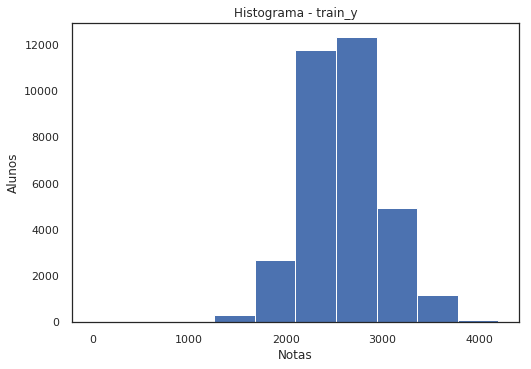

Resultado Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11788.567812316254 86.18740233062171
Resultado Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11786.673810163153 86.223454921482
Resultado Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, wit

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False) 14013.7544775201 93.22885974389754


,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11788.568,86.187,0.014
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11786.674,86.223,0.009
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11788.548,86.188,0.007
3,"DecisionTreeRegressor(criterion='mse', max_dep...",22935.115,119.444,0.163
4,"(DecisionTreeRegressor(criterion='mse', max_de...",14013.754,93.229,0.781


In [45]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

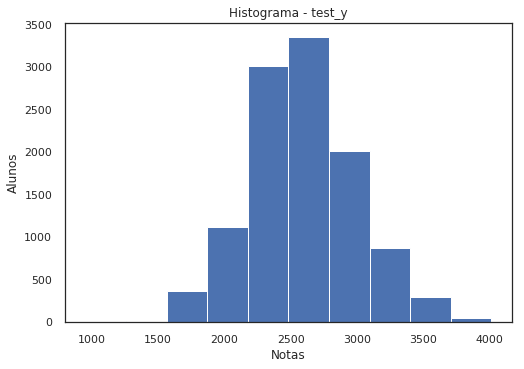

In [46]:
# solução: histograma

plt.hist(test_y)
plt.title('Histograma - test_y')
plt.xlabel('Notas')
plt.ylabel('Alunos')
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [0]:
# solução

def top_p(serie, p = 0.75):
     # calcule o quantil p
    quant = np.quantile(serie, p)
    print("quantile encontrado", quant)
    a_trocar = {True : 1, False :0}
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = serie > quant
    y = y.map(a_trocar)
    return y

In [48]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [49]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [50]:
# código pronto

y_top25 = top_p(test_y, p = 0.75)
y_top25.mean()

quantile encontrado 2837.8500000000004


0.2500225896810337

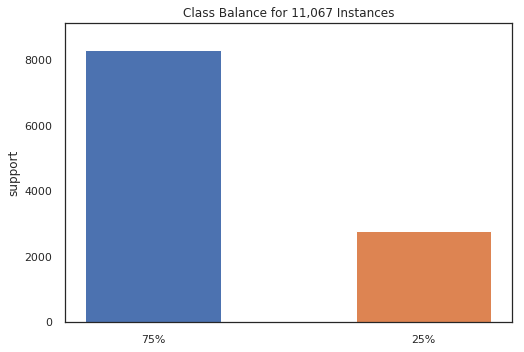

In [51]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

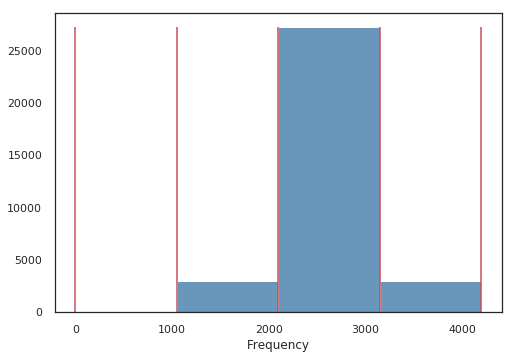

In [52]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [0]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(strategy="most_frequent"), LogisticRegression(), 
               RidgeClassifier(), DecisionTreeClassifier(), 
               RandomForestClassifier(n_estimators=10), SVC()]
    return modelos

In [0]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [0]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    # defina X como todas as colunas de `dados` exceto top_p
    x = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    
    
    # defina y como somente a coluna top_p
    y = dados["top_p"]

    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,
          test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [57]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse["top_p"] = top_p(pd.Series(interesse["nota_total"]), p = 0.75).values
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Pergunta: implemente o treino e o teste do classificador

In [0]:
# solução:

from sklearn.metrics import accuracy_score
import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)

    tac = time.time()
    tempo_de_treino = tac - tic
    
    # calcule a accuracy_score
    previsoes = pipe.predict(test_x)
    acuracia = accuracy_score(test_y, previsoes)*100

    print("Resultado", nome, acuracia)

    return acuracia, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [0]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    nota_total = dados["nota_total"]
    interesse['top_p'] = top_p(pd.Series(nota_total), p = 0.75).values

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


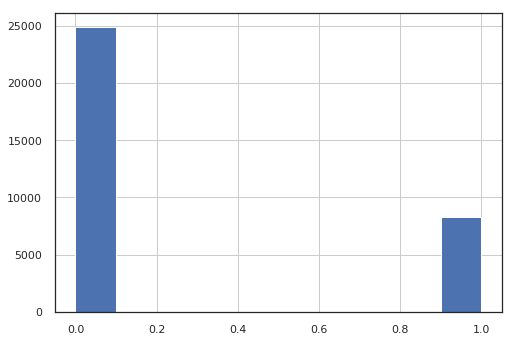

In [60]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [0]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        acuracia, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, acuracia])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "acuracia"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


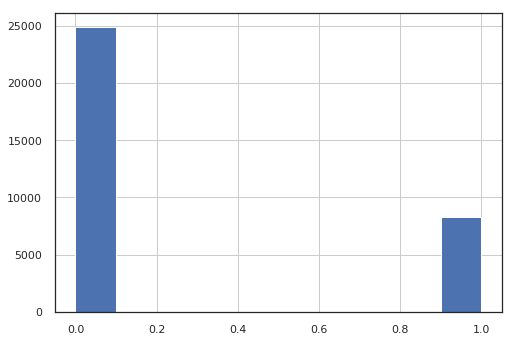

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.009
LogisticRegression,93.711,0.061
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.104
RandomForestClassifier,92.609,0.271
SVC,93.747,7.694


In [62]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda)
notas[["acuracia", "tempo_de_treino"]]

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


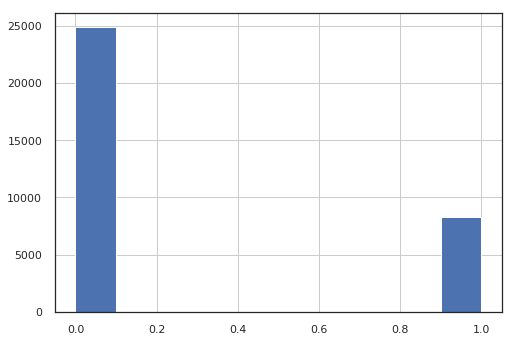

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.007
LogisticRegression,93.711,0.060
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.105
RandomForestClassifier,92.609,0.272
SVC,93.747,7.716


In [63]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.80)
notas[["acuracia", "tempo_de_treino"]]

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


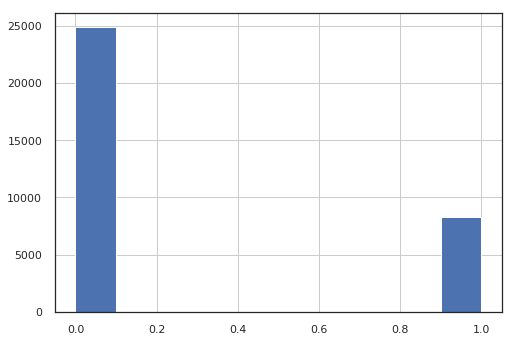

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.007
LogisticRegression,93.711,0.058
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.103
RandomForestClassifier,92.609,0.265
SVC,93.747,7.824


In [64]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.90)
notas[["acuracia", "tempo_de_treino"]]

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


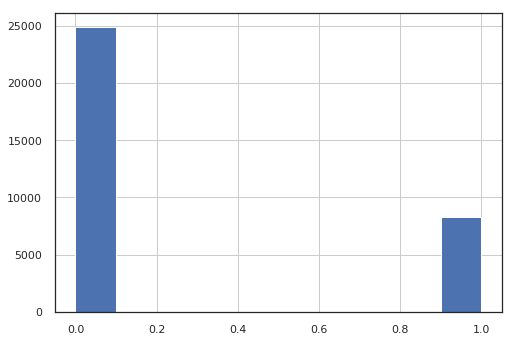

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.007
LogisticRegression,93.711,0.057
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.106
RandomForestClassifier,92.609,0.269
SVC,93.747,7.838


In [65]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.95)
notas[["acuracia", "tempo_de_treino"]]

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


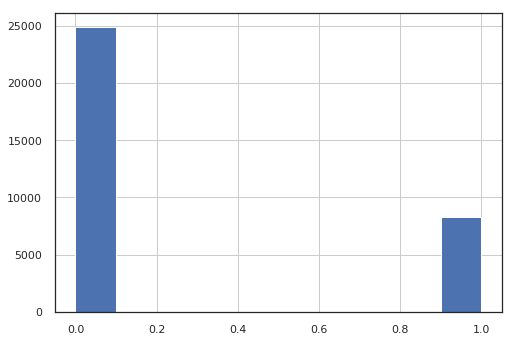

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.011
LogisticRegression,93.711,0.059
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.106
RandomForestClassifier,92.609,0.262
SVC,93.747,7.738


In [66]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.99)
notas[["acuracia", "tempo_de_treino"]]

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


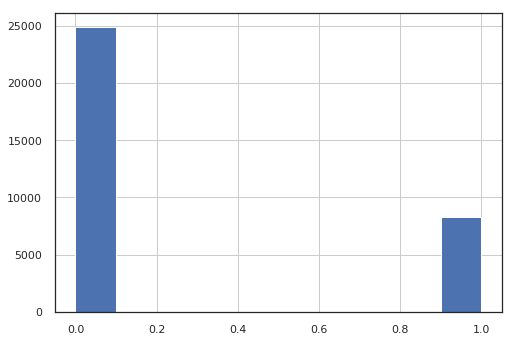

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.008
LogisticRegression,93.711,0.062
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.103
RandomForestClassifier,92.609,0.259
SVC,93.747,7.783


In [67]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.25)
notas[["acuracia", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


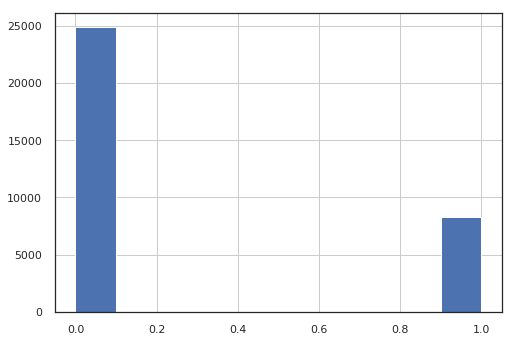

Resultado DummyClassifier 74.99774103189662
Resultado LogisticRegression 93.71103280021687
Resultado RidgeClassifier 92.04843227613625
Resultado DecisionTreeClassifier 90.68401554170055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado RandomForestClassifier 92.6086563657721
Resultado SVC 93.74717628987078


,acuracia,tempo_de_treino
tipo,,
DummyClassifier,74.998,0.008
LogisticRegression,93.711,0.060
RidgeClassifier,92.048,0.015
DecisionTreeClassifier,90.684,0.107
RandomForestClassifier,92.609,0.266
SVC,93.747,7.860


In [68]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
notas[["acuracia", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [0]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9371103280021686


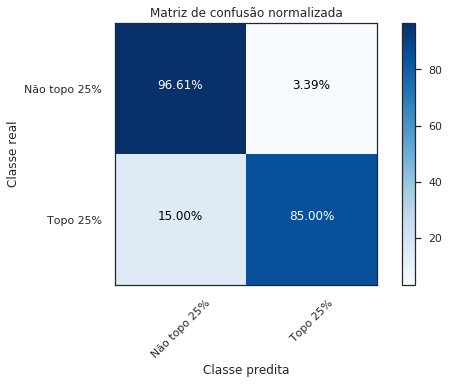

In [70]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


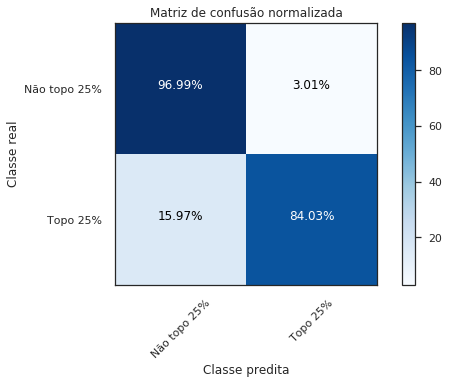

In [71]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [72]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


In [73]:
enem_validacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
1,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
2,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
3,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
4,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500
5,533.800,427.600,320.700,479.000,80.000,100.000,80.000,60.000,0.000,2081.100
6,613.200,616.700,623.100,656.500,140.000,120.000,120.000,120.000,60.000,3069.500
7,445.700,458.000,462.500,430.100,100.000,120.000,100.000,80.000,20.000,2216.300
8,501.800,566.600,544.900,645.100,160.000,120.000,120.000,120.000,100.000,2878.400
9,462.500,523.600,571.500,517.600,160.000,120.000,120.000,140.000,80.000,2695.200


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [0]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    y = top_p(enem_validacao["nota_total"], p = 0.75).values
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [0]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    
    X, y = separa_dados_de_classificacao_para_validacao(enem_validacao)

    scores = cross_val_score(modelo, X, y, cv = 5)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.24992681096372904


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Acurácia entre [93.49,93.49]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurácia do modelo em teste 0.9350227393715029


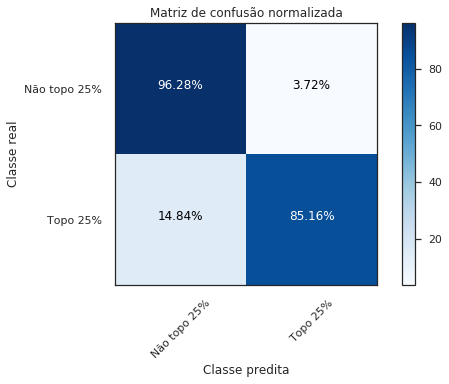

In [76]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [0]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis = 1)# some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis = 1)# some por coluna
        y_pred_true_false = parcial > self.top_25_quantile# compare a soma parcial com o self.top25_quantile
        a_trocar = {True : 1, False : 0}
        y_pred = y_pred_true_false.map(a_trocar)# 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.24992681096372904
top 25 quantile é 1239.80
top 25 quantile é 1246.50
top 25 quantile é 1243.80
top 25 quantile é 1253.00
top 25 quantile é 1256.20
Acurácia entre [91.87,91.91]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.9184688967702586


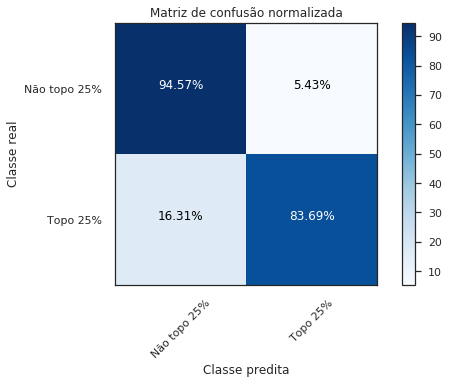

In [78]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

quantile encontrado 2839.5
Média da validação 0.24992681096372904
Acurácia entre [62.49,62.50]
Acurácia do modelo em teste 0.6248442950315654


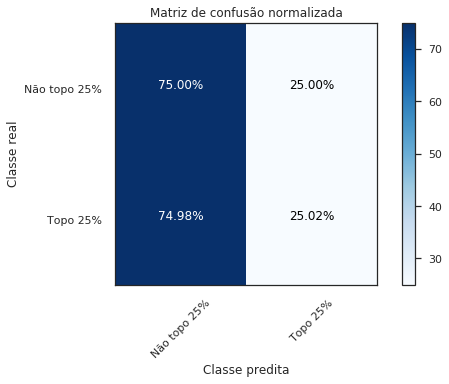

In [80]:
treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())

quantile encontrado 2839.5
Média da validação 0.24992681096372904


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Acurácia entre [93.43,93.44]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurácia do modelo em teste 0.9342905067373845


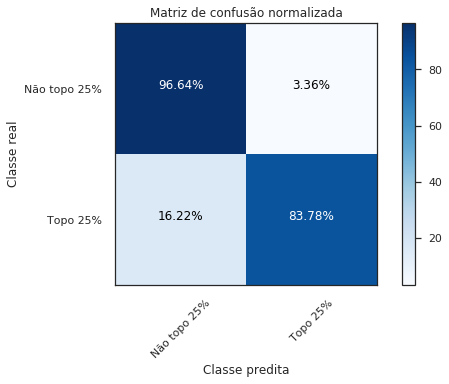

In [81]:
treina_e_valida_modelo_de_classificacao(enem_validacao, LogisticRegression())

### Solução

   O que se observou que em alguns casos após se avaliar os resultados, pode-se se criar heuristicas que são muito boas para aquele ambiente. Pois nos sabemos que essas colunas tem muita correlação com a nota total, logo um algoritimo utilizando esses fatores funciona muito bem para casos específicos. Entretanto o algoritimo da Regressão Logistica obteve uma acurácia de 93% contra 91% da heuristica.
Nesse caso, a heuristica funciona muito bem também. Pq as notas que você tirou dentro da prova são ligadas a sua nota total. Se os parâmetros fossem algo mais longe, como renda, escola do aluno, etc. Apresentar uma heuristica se torna muito mais complexo

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Sua solução aqui

In [0]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_CN", "NU_NOTA_LC","NU_NOTA_COMP3"]]
    y = top_p(dados["nota_total"],0.75) # calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

quantile encontrado 2839.5
Média da validação 0.24992681096372904
top 25 quantile é 1220.00
top 25 quantile é 1226.00
top 25 quantile é 1224.30
top 25 quantile é 1232.20
top 25 quantile é 1234.90
Acurácia entre [91.58,91.61]
top 25 quantile é 1227.50
Acurácia do modelo em teste 0.9158345478263826


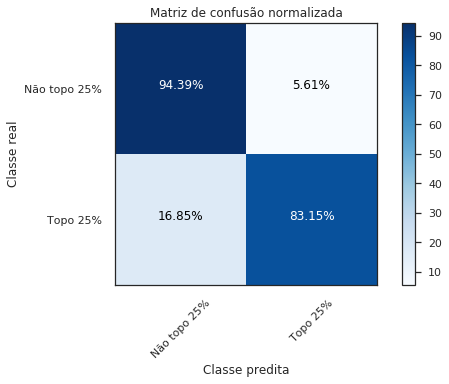

In [83]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

Se a falcudade utilizasse do modelo. Ela iria julgar errôneamente 5% das pessoas que ela julgou que não está no top 25%. Entretanto no top 25% ela iria julgar errôneamente 16% dos casos.


## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!